# Length and net charge as features

In [1]:
import pandas as pd
import numpy as np
import pyrepseq as prs
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from aaindex import aaindex1
import seaborn as sns

from src import *

sns.set_theme()
sns.set_style("ticks")


mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
mpl.rcParams['font.family'] = 'serif'

Matplotlib is building the font cache; this may take a moment.
/Users/james/Documents/Projects/TCR-info 2022/paper_tcrinfo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
olga = pd.read_csv('data/olga.csv.gz',sep=',').astype(str)
spc = pd.read_csv('data/spc.csv.gz',sep=',').astype(str)
epitope_meta = pd.read_csv('data/epitope_meta.csv.gz',sep=',')

## Information content of charge and length

In [3]:
aa_charges = aaindex1['KLEP840101']['values']
def compute_net_charge(sequence):
    
    return sum([aa_charges[aa] for aa in sequence])

In [4]:
olga['CDR3A_length'] = olga["CDR3A"].apply(len).astype(str)
spc["CDR3A_length"] = spc["CDR3A"].apply(len).astype(str)
olga['CDR3B_length'] = olga["CDR3B"].apply(len).astype(str)
spc["CDR3B_length"] = spc["CDR3B"].apply(len).astype(str)

olga['CDR3A_q'] = olga["CDR3A"].apply(lambda x: compute_net_charge(x)).astype(str)
spc["CDR3A_q"] = spc["CDR3A"].apply(lambda x: compute_net_charge(x)).astype(str)
olga['CDR3B_q'] = olga["CDR3B"].apply(lambda x: compute_net_charge(x)).astype(str)
spc["CDR3B_q"] = spc["CDR3B"].apply(lambda x: compute_net_charge(x)).astype(str)

In [5]:
info_lengths = prs.renyi2_entropy(olga, "CDR3A_length") + prs.renyi2_entropy(olga, "CDR3B_length") - prs.renyi2_entropy(spc, ["CDR3A_length", "CDR3B_length"], "Epitope")
info_length_alpha = prs.renyi2_entropy(olga, "CDR3A_length") - prs.renyi2_entropy(spc, "CDR3A_length", "Epitope")
info_length_beta = prs.renyi2_entropy(olga, "CDR3B_length") - prs.renyi2_entropy(spc, "CDR3B_length", "Epitope")

info_lengths_given_genes = prs.renyi2_entropy(olga, "CDR3A_length", ['TRAV', 'TRAJ']) + prs.renyi2_entropy(olga, "CDR3B_length", ['TRBV', 'TRBJ']) - prs.renyi2_entropy(spc, ["CDR3A_length", "CDR3B_length"], ["Epitope", 'TRAV', 'TRAJ', 'TRBV', 'TRBJ'])
info_alpha_given_genes = prs.renyi2_entropy(olga, "CDR3A_length", ['TRAV', 'TRAJ']) - prs.renyi2_entropy(spc, "CDR3A_length", ["Epitope", 'TRAV', 'TRAJ'])
info_beta_given_genes = prs.renyi2_entropy(olga, "CDR3B_length", ['TRBV', 'TRBJ']) - prs.renyi2_entropy(spc, "CDR3B_length", ["Epitope", 'TRBV', 'TRBJ'])

info_charge = prs.renyi2_entropy(olga, "CDR3A_q") + prs.renyi2_entropy(olga, "CDR3B_q") - prs.renyi2_entropy(spc, ["CDR3A_q", "CDR3B_q"], "Epitope")
info_charge_alpha = prs.renyi2_entropy(olga, "CDR3A_q") - prs.renyi2_entropy(spc, "CDR3A_q", "Epitope")
info_charge_beta = prs.renyi2_entropy(olga, "CDR3B_q") - prs.renyi2_entropy(spc, "CDR3B_q", "Epitope")

info_charge_given_genes = prs.renyi2_entropy(olga, "CDR3A_q", ['TRAV', 'TRAJ']) + prs.renyi2_entropy(olga, "CDR3B_q", ['TRBV', 'TRBJ']) - prs.renyi2_entropy(spc, ["CDR3A_q", "CDR3B_q"], ["Epitope", 'TRAV', 'TRAJ', 'TRBV', 'TRBJ'])
info_alpha_charge_given_genes = prs.renyi2_entropy(olga, "CDR3A_q", ['TRAV', 'TRAJ']) - prs.renyi2_entropy(spc, "CDR3A_q", ["Epitope", 'TRAV', 'TRAJ'])
info_beta_charge_given_genes = prs.renyi2_entropy(olga, "CDR3B_q", ['TRBV', 'TRBJ']) - prs.renyi2_entropy(spc, "CDR3B_q", ["Epitope", 'TRBV', 'TRBJ'])

In [6]:
alpha_beta_length_grid = np.zeros((2,2))
alpha_beta_length_grid[0 ,1] = alpha_beta_length_grid[1 ,0] = info_lengths
alpha_beta_length_grid[0 ,0] = info_length_alpha
alpha_beta_length_grid[1 ,1] = info_length_beta

In [7]:
alpha_beta_charge_grid = np.zeros((2,2))
alpha_beta_charge_grid[0 ,1] = alpha_beta_charge_grid[1 ,0] = info_charge
alpha_beta_charge_grid[0 ,0] = info_charge_alpha
alpha_beta_charge_grid[1 ,1] = info_charge_beta

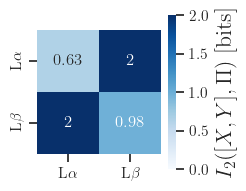

In [8]:
plot_grid(alpha_beta_length_grid, ["L$\\alpha$", "L$\\beta$"], ["L$\\alpha$", "L$\\beta$"], save_path='figures/', save_file_name='figureS3a.svg', vmin=0, vmax=2, cbar_kws = {'label': '$I_2([X, Y], \Pi)$ [bits]'})

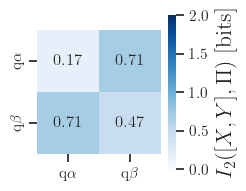

In [9]:
plot_grid(alpha_beta_charge_grid, ["q$\\alpha$", "q$\\beta$"], ["q$\\alpha$", "q$\\beta$"],  save_path='figures/', save_file_name='figureS3b.svg', vmin=0, vmax=2, cbar_kws = {'label': '$I_2([X, Y], \Pi)$ [bits]'})

## Charge and length become more relevant ones genes are conditioned on

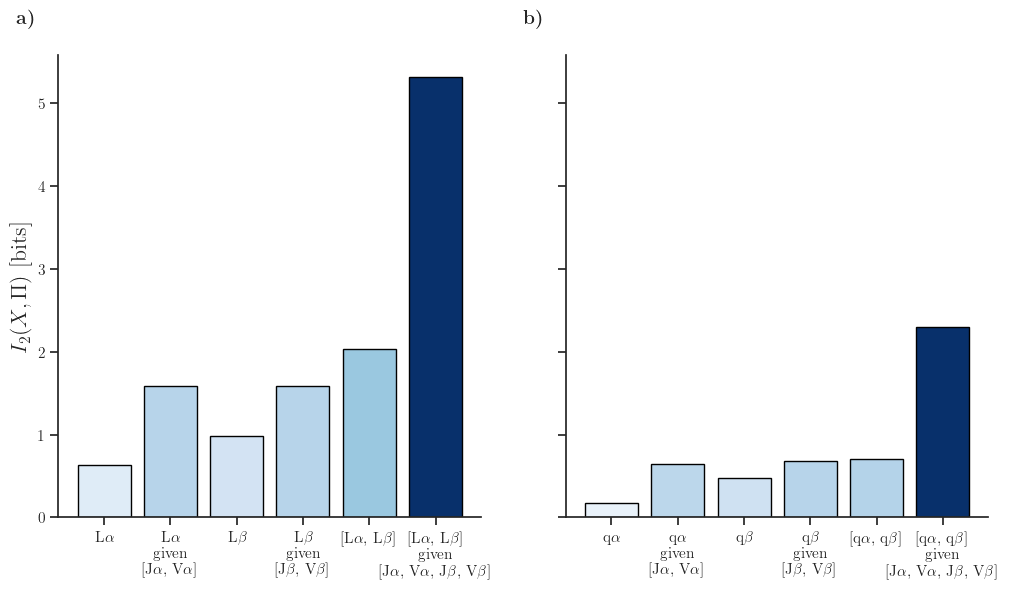

In [10]:
labels1 = ['L$\\alpha$', 'L$\\alpha$ \n given \n [J$\\alpha$, V$\\alpha$]', 'L$\\beta$', 'L$\\beta$ \n given \n [J$\\beta$, V$\\beta$]',
           '[L$\\alpha$, L$\\beta$]', '[L$\\alpha$, L$\\beta$] \n given \n [J$\\alpha$, V$\\alpha$, J$\\beta$, V$\\beta$]']
values1 = [info_length_alpha, info_alpha_given_genes, info_length_beta, info_beta_given_genes, info_lengths, info_lengths_given_genes]


labels2 = ['q$\\alpha$', 'q$\\alpha$ \n given \n [J$\\alpha$, V$\\alpha$]', 'q$\\beta$', 'q$\\beta$ \n given \n [J$\\beta$, V$\\beta$]',
           '[q$\\alpha$, q$\\beta$]', '[q$\\alpha$, q$\\beta$] \n given \n [J$\\alpha$, V$\\alpha$, J$\\beta$, V$\\beta$]']
values2 = [info_charge_alpha, info_alpha_charge_given_genes, info_charge_beta, info_beta_charge_given_genes, info_charge, info_charge_given_genes]

fig, axs = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)

ax1 = axs[0]
ax1.text(-0.1, 1.1, '\\bf a)', transform=ax1.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left')
norm1 = Normalize(vmin=0, vmax=max(values1))
cmap1 = plt.get_cmap('Blues')
bars1 = ax1.bar(labels1, values1, color=[cmap1(norm1(value)) for value in values1], edgecolor='black')
ax1.set_ylabel('$I_2(X, \Pi)$ [bits]')

ax2 = axs[1]
ax2.text(-0.1, 1.1, '\\bf b)', transform=ax2.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left')
norm2 = Normalize(vmin=0, vmax=max(values2))
cmap2 = plt.get_cmap('Blues')
bars2 = ax2.bar(labels2, values2, color=[cmap2(norm2(value)) for value in values2], edgecolor='black')

plt.savefig('figures/figureS2.svg', bbox_inches='tight', dpi=500);